# Disaster Tweets Classification Using Natural Language Processing (NLP)
Twitter has become an important communication channel in times of emergency. The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster.

This dataset was created by the company figure-eight and originally shared on their ‘Data For Everyone’ website here.


Competition link : https://www.kaggle.com/c/nlp-getting-started/overview

## Problem Statement:
To classify tweets whether they indicate a disaster or not. - Binary Classification

## Project Planning
1. Import Libraries
2. Load Data

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 150)

import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

plt.rcParams.update({'font.size': 12})

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Data

In [2]:
# Load data
df_train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
sub_sample = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

print (df_train.shape, df_test.shape, sub_sample.shape)

(7613, 5) (3263, 4) (3263, 2)


In [3]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# df_train = pd.read_csv(r'/content/drive/MyDrive/Projects and Datasets/Disaster Tweet Classification NLP/train.csv')
# df_test = pd.read_csv(r'/content/drive/MyDrive/Projects and Datasets/Disaster Tweet Classification NLP/test.csv')

In [4]:
print('df_train data shape: ',df_train.shape)
print('df_test data shape: ',df_test.shape)

df_train data shape:  (7613, 5)
df_test data shape:  (3263, 4)


In [5]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [6]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Exploratory Data Analysis

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
print('Null values from df_train data')
null_df_train = df_train.isnull().sum(axis=0)
print(null_df_train)

print('\n\nNull values from df_test data')
null_df_test = df_test.isnull().sum(axis=0)
print(null_df_test)

Null values from df_train data
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


Null values from df_test data
id             0
keyword       26
location    1105
text           0
dtype: int64


<AxesSubplot:>

<AxesSubplot:>

Text(0, 0.5, 'Value Percentage')

Text(0.5, 1.0, 'Train Set')

Text(0.5, 1.0, 'Test Set')

Text(0.0, 0.0, '0.00')

Text(1.0, 0.008012610009194798, '0.01')

Text(2.0, 0.33272034677525286, '0.33')

Text(3.0, 0.0, '0.00')

Text(4.0, 0.0, '0.00')

Text(0.0, 0.0, '0.00')

Text(1.0, 0.00796812749003984, '0.01')

Text(2.0, 0.3386454183266932, '0.34')

Text(3.0, 0.0, '0.00')

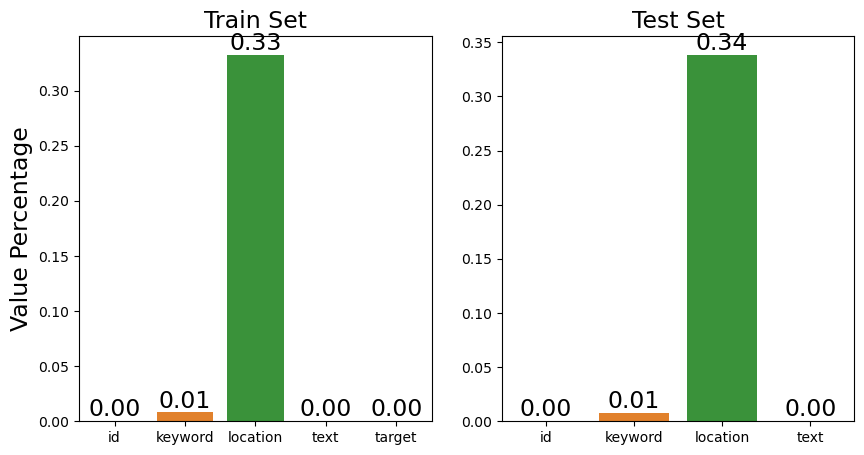

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.barplot(x = null_df_train.index, y = null_df_train.values/df_train.shape[0], ax=ax[0])
sns.barplot(x = null_df_test.index, y = null_df_test.values/df_test.shape[0], ax=ax[1])

ax[0].set_ylabel('Value Percentage', size=17)
ax[0].set_title('Train Set', fontsize=17)
ax[1].set_title('Test Set', fontsize=17)

for ax in ax:
  ax.tick_params(labelsize=10)
  for p in ax.patches:
      ax.annotate('{:.2f}'.format(p.get_height()),
                  (p.get_x() + 0.4, p.get_height()),
                  ha='center', va='bottom', color='black', size=17)
plt.show()

Very similar null value distribution of Train and Test data. It might indicate Train and test data are good samples from the population.

Null values in 'Keyword' column is imputed with 'None' value first. As keyword is an important feature for summarizing the disaster, it can be filled with a word from tweet text. This treatment can be done during Preprocessing.  
Need to explore 'location' field to impute null values.

Lets explore the 'keyword' column 

target
0    0.57034
1    0.42966
Name: id, dtype: float64


<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:title={'center':'Target distribution in df_training Set'}>

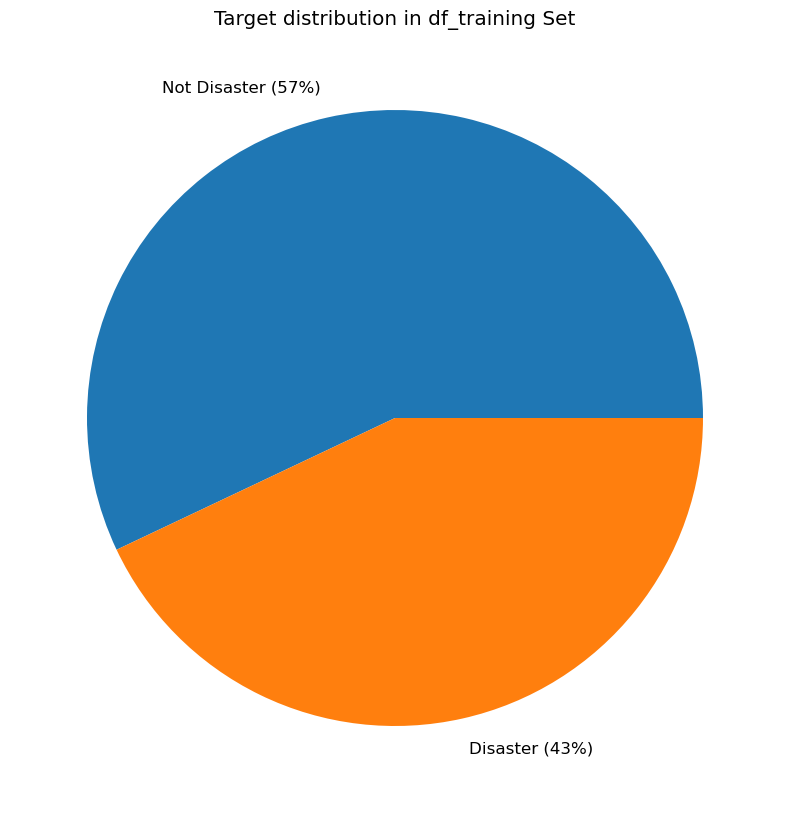

In [10]:
# Proportion of Target Classes
class_count = df_train.groupby('target').count()['id']/df_train.shape[0]
print(class_count)

plt.figure(figsize = (10,10))
df_train.groupby('target').count()['id'].plot(kind='pie', 
                                          labels=['Not Disaster (57%)', 'Disaster (43%)'],
                                          title='Target distribution in df_training Set',
                                          ylabel='')

In [11]:
df_train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [12]:
df_train_temp = df_train['keyword'].value_counts()
df_train_temp[df_train_temp.values < 30]

annihilation             29
bombing                  29
obliteration             29
sirens                   29
snowstorm                29
desolate                 29
seismic                  29
first%20responders       29
rubble                   28
demolished               28
deluged                  27
volcano                  27
battle                   26
bush%20fires             25
war%20zone               24
rescue                   22
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, dtype: int64

There is a '%20' character in the text, this needs to treated with space.

### Treating 'keyword' column

In [13]:
# Fill missing values with 'None'
df_train['keyword'] = df_train['keyword'].fillna(f'None')
df_test['keyword'] = df_test['keyword'].fillna(f'None')

# fix '20%' typo in 'keyword' column
df_train['keyword'] = df_train['keyword'].apply(lambda x: re.sub('%20', ' ', x))
df_test['keyword'] = df_test['keyword'].apply(lambda x: re.sub('%20', ' ', x))

In [14]:
# Filling 'None' values in 'keyword' column with a word from 'keyword' column values, which is present in that text.
# For each row with 'keyword' = None
#   Check corresponding 'text' for an existing 'keyword' value
#       If found, replace 'None' with that 'keyword' value
no_keyword = df_train['keyword'] == 'None'
keywords = np.unique(df_train[~no_keyword]['keyword'].to_numpy())

for df in [df_train, df_test]:
    for i in range(len(df)):
        if df.loc[i, 'keyword'] == 'None':
            for k in keywords:
                if k in df.loc[i, 'text'].lower():
                    df.loc[i, 'keyword'] = k
                    break

In [15]:
print('Number of missing values left:')
print('For Train set:', df_train[df_train['keyword'] == 'None'].shape[0])
print('For Test set:', df_test[df_test['keyword'] == 'None'].shape[0])

pd.concat([df_train[df_train['keyword'] == 'None']['text'], df_test[df_test['keyword'] == 'None']['text']])

Number of missing values left:
For Train set: 16
For Test set: 9


15                                                              What's up man?
16                                                               I love fruits
17                                                            Summer is lovely
18                                                           My car is so fast
19                                                What a goooooooaaaaaal!!!!!!
20                                                      this is ridiculous....
21                                                           London is cool ;)
22                                                                 Love skiing
23                                                       What a wonderful day!
24                                                                    LOOOOOOL
25                                              No way...I can't eat that shit
26                                                       Was in NYC last week!
27                                                  

These are the final 'text' columns values having 'None' value for 'keyword' column. They don't have any significant keyword, so left as they are, these rows have 'keyword'= None

In [16]:
# Fill missing values with 'None'
df_train['location'] = df_train['location'].fillna(f'None')
df_test['location'] = df_test['location'].fillna(f'None')

In [17]:
df_train.isna().sum()
df_test.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

id          0
keyword     0
location    0
text        0
dtype: int64

Text(0.5, 1.0, 'Top keywords for disaster tweets')

Text(0.5, 0, 'Count')

<AxesSubplot:title={'center':'Top keywords for disaster tweets'}, xlabel='keyword'>

Text(0.5, 1.0, 'Top keywords for non-disaster tweets')

Text(0.5, 0, 'Count')

<AxesSubplot:title={'center':'Top keywords for non-disaster tweets'}, xlabel='keyword'>

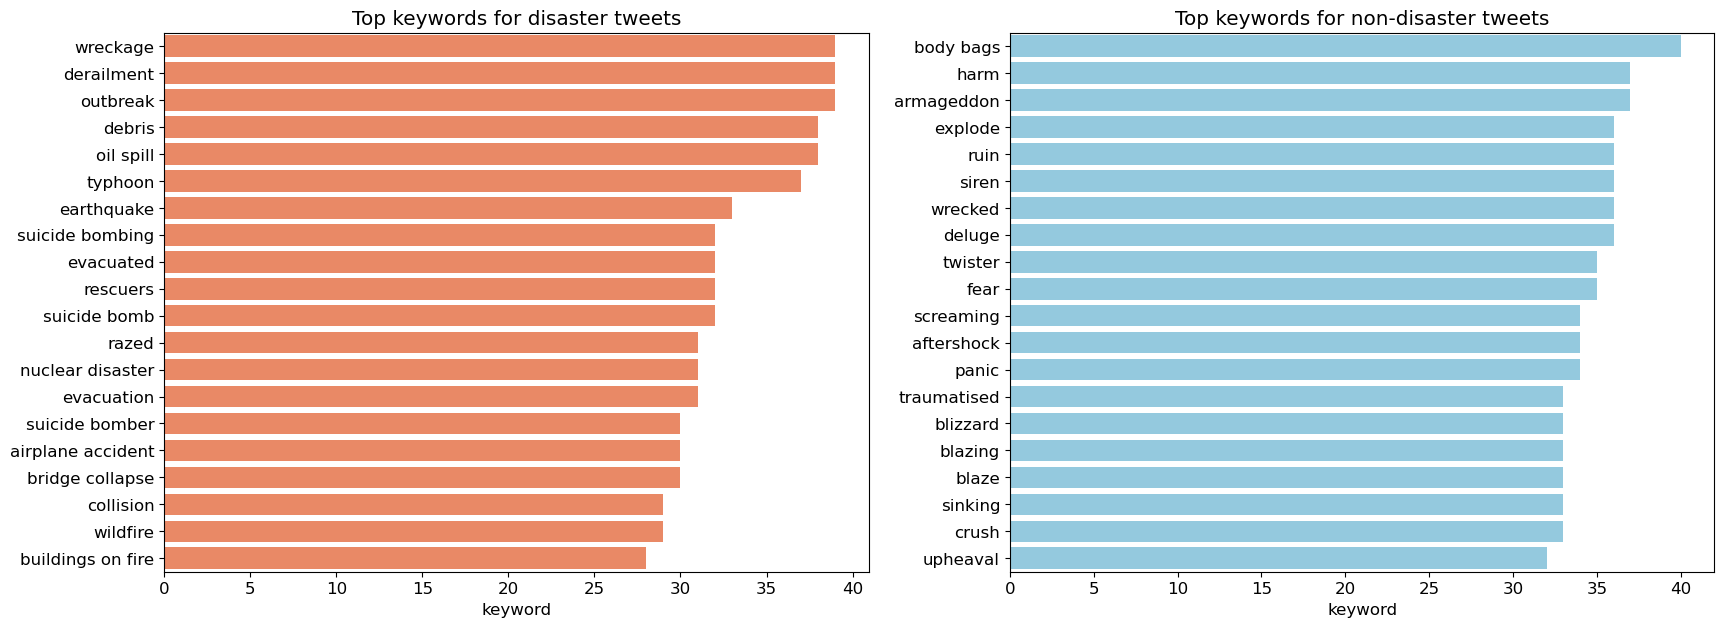

In [18]:
# Top 20 keywords for each class

disaster = df_train[df_train['target']==1]['keyword'].value_counts().head(20)
non_disaster = df_train[df_train['target']==0]['keyword'].value_counts().head(20)

fig, ax = plt.subplots(1,2, figsize=(20,7))

ax[0].set_title('Top keywords for disaster tweets')
ax[0].set_xlabel('Count')
sns.barplot(x = disaster, y = disaster.index, color='coral', ax=ax[0] )

ax[1].set_title('Top keywords for non-disaster tweets')
ax[1].set_xlabel('Count')
sns.barplot(x = non_disaster, y = non_disaster.index, color='skyblue',  ax=ax[1])

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Length of Disastrous Tweets')

<AxesSubplot:title={'center':'Length of Disastrous Tweets'}, xlabel='text', ylabel='Density'>

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Length of Non-Disastrous Tweets')

<AxesSubplot:title={'center':'Length of Non-Disastrous Tweets'}, xlabel='text', ylabel='Density'>

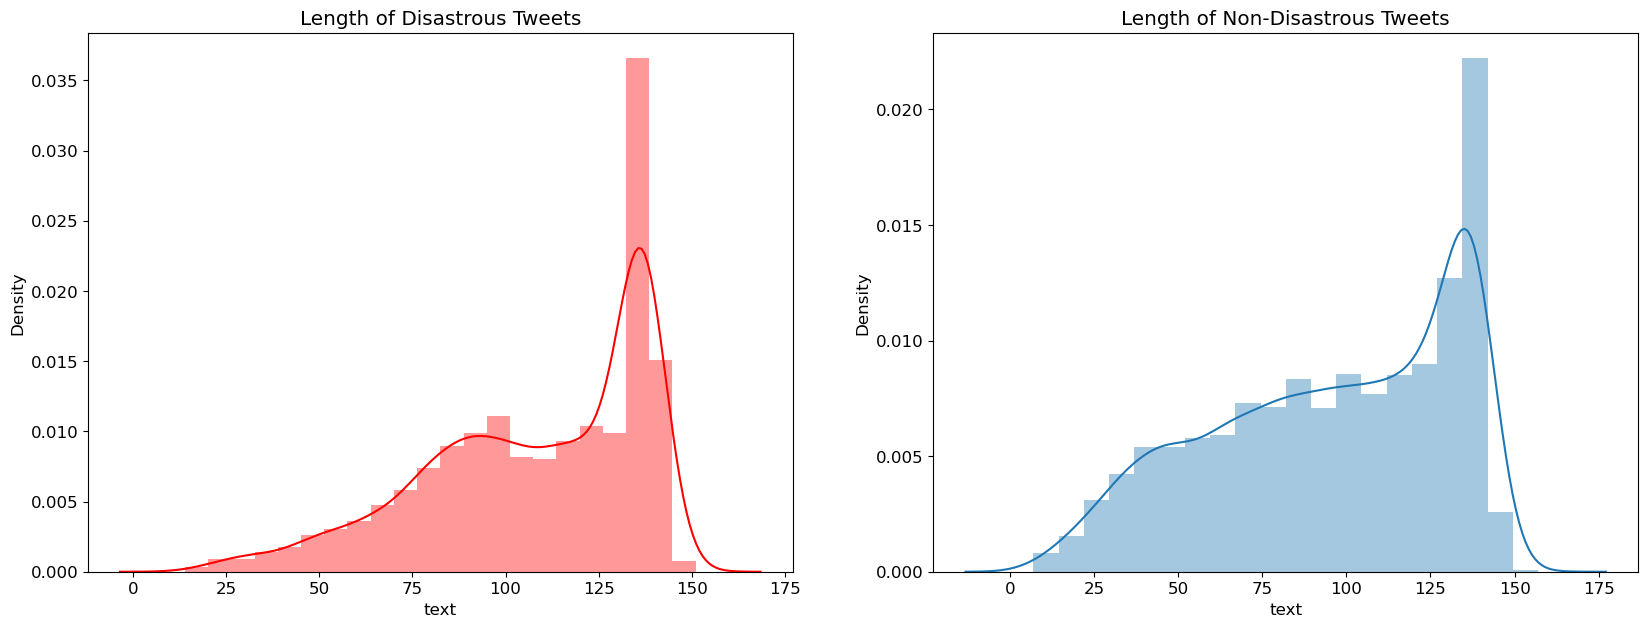

In [19]:
# Tweet Length for both classes

pos_tw_len = df_train[df_train['target'] == 1]['text'].str.len()
neg_tw_len = df_train[df_train['target'] == 0]['text'].str.len()

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel(' ')
ax[0].set_title('Length of Disastrous Tweets')
sns.distplot(pos_tw_len, label='Disaster Tweet length', ax=ax[0], color='red')

ax[1].set_xlabel(' ')
ax[1].set_title('Length of Non-Disastrous Tweets')
sns.distplot(neg_tw_len, label='Non-Disaster Tweet length', ax=ax[1])

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Word Count of Disastrous Tweets')

<AxesSubplot:title={'center':'Word Count of Disastrous Tweets'}, xlabel='text', ylabel='Density'>

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Word Count of Non-Disastrous Tweets')

<AxesSubplot:title={'center':'Word Count of Non-Disastrous Tweets'}, xlabel='text', ylabel='Density'>

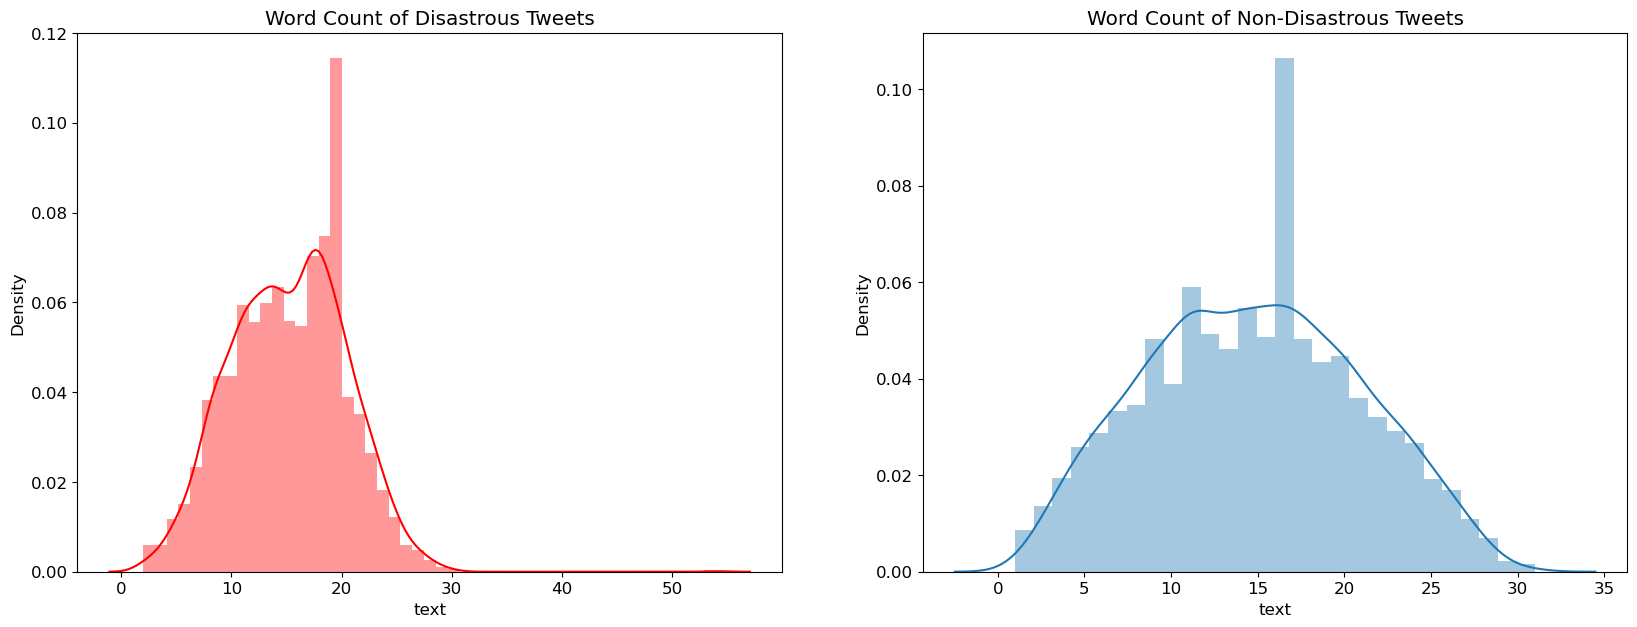

In [20]:
# Word Count of Tweets in both classes
pos_tw_len = df_train[df_train['target'] == 1]['text'].apply(lambda x: len(x.split(' ')))
neg_tw_len = df_train[df_train['target'] == 0]['text'].apply(lambda x: len(x.split(' ')))

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel(' ')
ax[0].set_title('Word Count of Disastrous Tweets')
sns.distplot(pos_tw_len, label='Disaster Tweet length', ax=ax[0], color='red')

ax[1].set_xlabel(' ')
ax[1].set_title('Word Count of Non-Disastrous Tweets')
sns.distplot(neg_tw_len, label='Non-Disaster Tweet length', ax=ax[1])

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Unique Word Count of Disastrous Tweets')

<AxesSubplot:title={'center':'Unique Word Count of Disastrous Tweets'}, xlabel='text', ylabel='Density'>

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Unique Word Count of Non-Disastrous Tweets')

<AxesSubplot:title={'center':'Unique Word Count of Non-Disastrous Tweets'}, xlabel='text', ylabel='Density'>

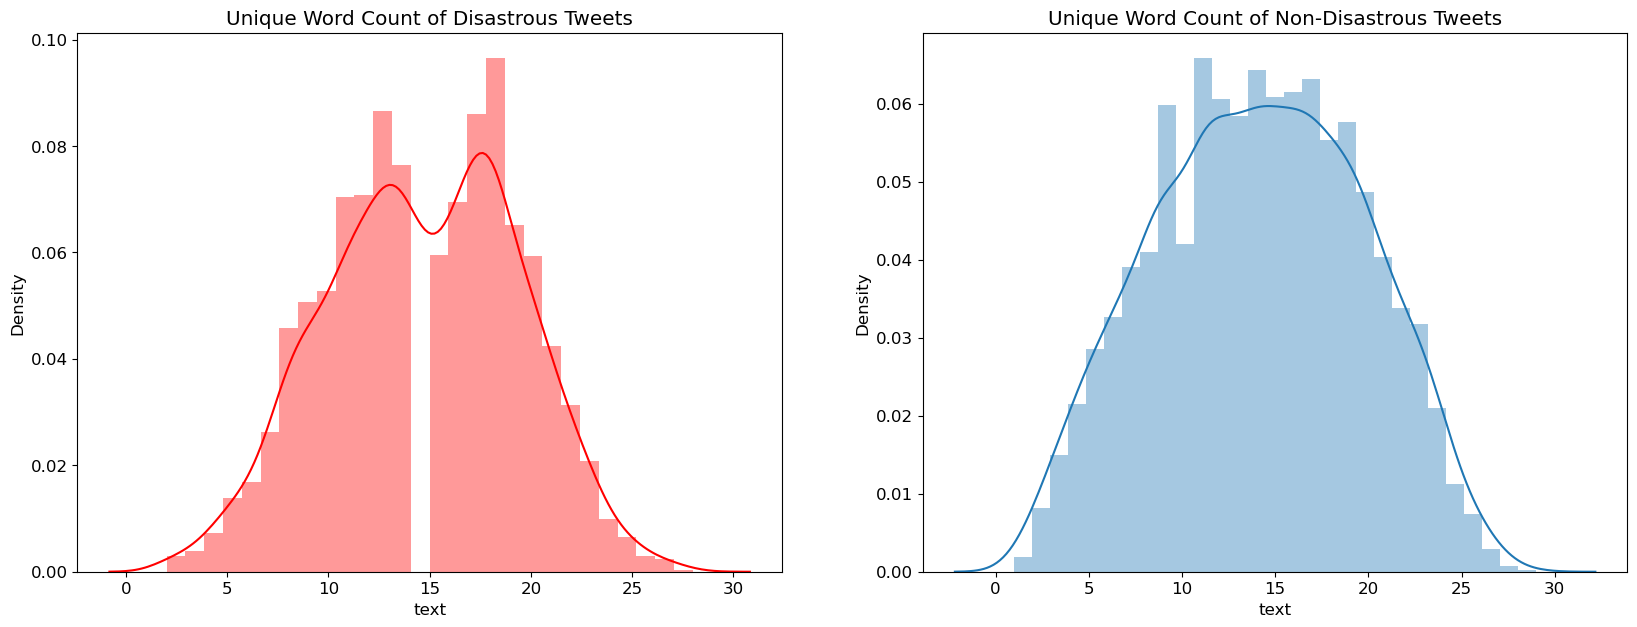

In [21]:
# Number of Unique words in Tweets in both classes
pos_tw_len = df_train[df_train['target'] == 1]['text'].apply(lambda x: len(set(x.split(' '))))
neg_tw_len = df_train[df_train['target'] == 0]['text'].apply(lambda x: len(set(x.split(' '))))

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel(' ')
ax[0].set_title('Unique Word Count of Disastrous Tweets')
sns.distplot(pos_tw_len, label='Disaster Tweet length', ax=ax[0], color='red')

ax[1].set_xlabel(' ')
ax[1].set_title('Unique Word Count of Non-Disastrous Tweets')
sns.distplot(neg_tw_len, label='Non-Disaster Tweet length', ax=ax[1])

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Hashtags Count of Disastrous Tweets')

<AxesSubplot:title={'center':'Hashtags Count of Disastrous Tweets'}, xlabel='text', ylabel='Density'>

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Hashtags Count of Non-Disastrous Tweets')

<AxesSubplot:title={'center':'Hashtags Count of Non-Disastrous Tweets'}, xlabel='text', ylabel='Density'>

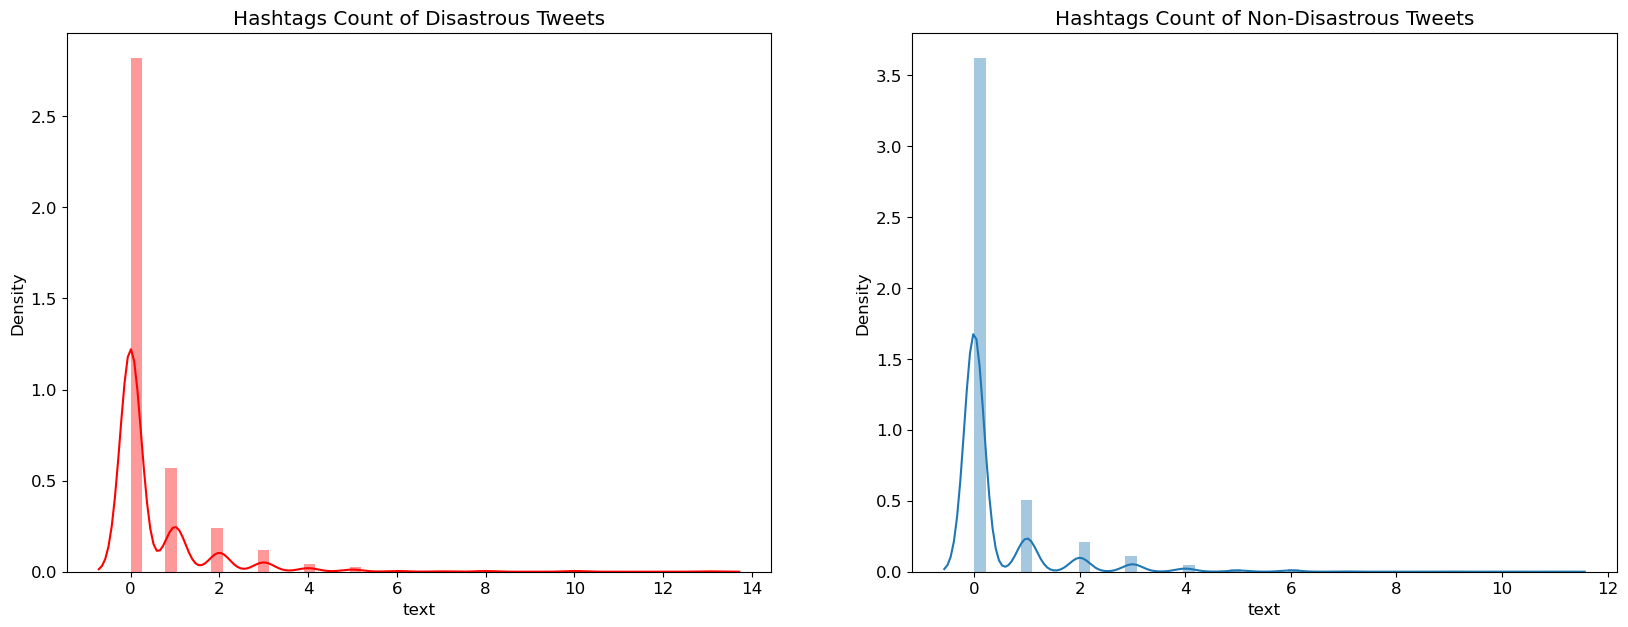

In [22]:
# Number of occurances of # hashtag in a tweet in both classes
pos_tw = df_train[df_train['target'] == 1]['text'].apply(lambda x: x.count('#'))
neg_tw = df_train[df_train['target'] == 0]['text'].apply(lambda x: x.count('#'))

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel(' ')
ax[0].set_title('Hashtags Count of Disastrous Tweets')
sns.distplot(pos_tw, label='Disaster Tweet length', ax=ax[0], color='red')

ax[1].set_xlabel(' ')
ax[1].set_title('Hashtags Count of Non-Disastrous Tweets')
sns.distplot(neg_tw, label='Non-Disaster Tweet length', ax=ax[1])


<AxesSubplot:xlabel='count'>

Text(0.5, 1.0, 'Top 20 hastags in disaster tweets')

<AxesSubplot:xlabel='count'>

Text(0.5, 1.0, 'Top 20 hastags in non-disaster tweets')

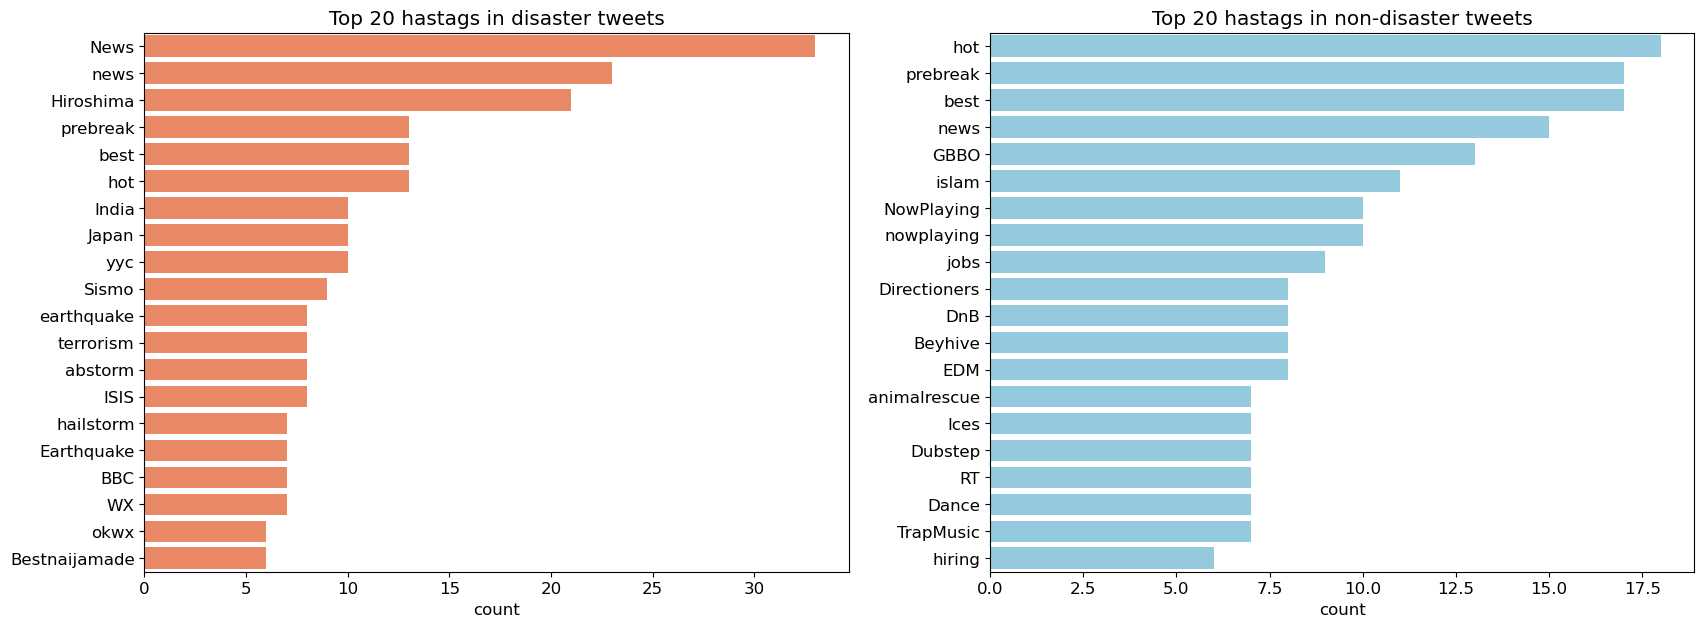

In [23]:
# Top 20 Hastags for each class
def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'None'
df_train['hashtags'] = df_train['text'].apply(lambda x: find_hashtags(x))
df_test['hashtags'] = df_test['text'].apply(lambda x: find_hashtags(x))

fig, ax = plt.subplots(1,2, figsize=(20,7))


freq_d = FreqDist(w for w in word_tokenize(' '.join(df_train.loc[df_train['target']==1, 'hashtags'])) if w != 'None')
df_d = pd.DataFrame.from_dict(freq_d, orient='index', columns=['count'])
hashtag_d = df_d.sort_values('count', ascending=False).head(20)
sns.barplot(x = hashtag_d['count'], y = hashtag_d.index, color='coral', ax = ax[0])
ax[0].set_title('Top 20 hastags in disaster tweets')

freq_nd = FreqDist(w for w in word_tokenize(' '.join(df_train.loc[df_train['target']==0, 'hashtags'])) if w != 'None')
df_nd = pd.DataFrame.from_dict(freq_nd, orient='index', columns=['count'])
hashtag_nd = df_nd.sort_values('count', ascending=False).head(20)
sns.barplot(x = hashtag_nd['count'], y = hashtag_nd.index, ax = ax[1], color='skyblue')
ax[1].set_title('Top 20 hastags in non-disaster tweets')

plt.show()

In [24]:
# df_train[df_train['location'] != 'None']['location'].value_counts().plot(kind='pie')

## Preprocessing

In [25]:
df_train['text'][0:20]

0                                                                     Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1                                                                                                    Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3                                                                         13,000 people receive #wildfires evacuation orders in California 
4                                                  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
5                            #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
6                                           #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
7                   

### Data Cleaning
Need RegExp to clean the text, remove puntuations, remove stop words, and Lemmatize words.

In [26]:
def preprocess(data):
  '''The below preprocessing is performed.
    1. Lower casing
    2. Cleaning with RegExp
    3. Tokenizing
    4. Remove Punctuations
    5. Remove Stopwords
    6. Lemmatize
  '''
  # Converting all the text data to its lower form
  data = data.lower()

  # Cleaning with RegExp
  # Removing URLs from the text data
  data = re.sub(r'https?://\S+|www\.\S+', '', data)
  # Removing HTML Tags
  data = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", '', data)
  #Removing Non-Ascii
  data = re.sub(r'[^\x00-\x7f]','', data)
  # Removing Emojis
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  data = emoji_pattern.sub(r'', data)

  doc = nlp(data)

  # Remove Punctuations
  data = [token for token in doc if token.text not in string.punctuation]

  # Remove stopwords
  data = [token for token in data if not token.is_stop]

  # Lemmatize
  data = ' '.join([token.lemma_ for token in data])

  return data


In [27]:
%%time
df_train['cleaned_text'] = df_train['text'].apply(preprocess)
df_train.head()
df_train.shape

CPU times: user 52.1 s, sys: 65.3 ms, total: 52.2 s
Wall time: 52.4 s


(7613, 7)

In [28]:
%%time
df_test['cleaned_text'] = df_test['text'].apply(preprocess)
df_test.head()
df_test.shape

CPU times: user 22.8 s, sys: 40.1 ms, total: 22.8 s
Wall time: 22.9 s


(3263, 6)

In [29]:
# Dataset labels

labels = df_train['target']

## Model Building

### Experiment 1
Bag of Words with Array of ML Models

In [30]:
# Bag-of-Words Model
bow = CountVectorizer()
train_bow = bow.fit_transform(df_train['cleaned_text'])

print('Vocabulary Length : ', len(bow.vocabulary_))

Vocabulary Length :  14623


In [31]:
# Model Experimentations
# Machine Learning models
model = {'Logistic Regression' : LogisticRegression(random_state=1),
         'Support Vector Machines' : SVC(random_state=1),
         'Multinomial Naive Bayes' : MultinomialNB(),
         'Decision Trees' : DecisionTreeClassifier(random_state=1),
         'Random Forest Classifier' : RandomForestClassifier(random_state=1),
         'lightGBM': LGBMClassifier(random_state=1),
         'XG Boosting' : XGBClassifier(random_state=1)}


def models_fitting_pipeline(X, Y, models):
    model_score = {}
    for name, model in models.items():
        print("5-Fold Cross-Validation : ", name)
        
        model_score[name] = np.mean(cross_val_score(model,X, Y,
                                              cv=5,
                                              scoring='accuracy',
                                              verbose=2,
                                              n_jobs=-1))
        
    # Converting model_score to DataFrame
    model_score = {'5-Fold CV Score': model_score}
    model_score_df = pd.DataFrame(model_score)
    model_score_df.rename_axis('Model', inplace=True)
    model_score_df.reset_index(inplace=True)
    model_score_df.sort_values('5-Fold CV Score', ascending=False, inplace=True)
    return model_score_df

In [32]:
%%time
bow_score = models_fitting_pipeline(train_bow, labels, model)
bow_score

5-Fold Cross-Validation :  Logistic Regression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Support Vector Machines


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Multinomial Naive Bayes
5-Fold Cross-Validation :  Decision Trees


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Random Forest Classifier


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  lightGBM


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  XG Boosting
CPU times: user 280 ms, sys: 76.3 ms, total: 357 ms
Wall time: 1min 34s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


,Model,5-Fold CV Score
4,Support Vector Machines,0.704069
1,Logistic Regression,0.693034
2,Multinomial Naive Bayes,0.692771
3,Random Forest Classifier,0.644955
5,XG Boosting,0.625382
0,Decision Trees,0.613295
6,lightGBM,NaN


### Experiment 2
TF-IDF Vectorization with Array of ML models

In [33]:
# TF-IDF Model
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(df_train['cleaned_text'])
print('Vocabulary Length : ', len(tfidf.vocabulary_))

Vocabulary Length :  14623


In [34]:
%%time
tfidf_score = models_fitting_pipeline(train_tfidf, labels, model)
tfidf_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Logistic Regression


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Support Vector Machines


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Multinomial Naive Bayes
5-Fold Cross-Validation :  Decision Trees


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Random Forest Classifier


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  lightGBM


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  XG Boosting
CPU times: user 233 ms, sys: 23.2 ms, total: 256 ms
Wall time: 1min 36s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.6s finished


,Model,5-Fold CV Score
2,Multinomial Naive Bayes,0.717595
1,Logistic Regression,0.701177
4,Support Vector Machines,0.696184
6,lightGBM,0.651262
3,Random Forest Classifier,0.647061
5,XG Boosting,0.626962
0,Decision Trees,0.593326


### Experiment 3
Simple Scaling and Logistic Regression

In [35]:
from sklearn.preprocessing import MaxAbsScaler
pipe_lr = make_pipeline(MaxAbsScaler(), LogisticRegression(random_state=1)) 
pipe_svm = make_pipeline(MaxAbsScaler(), SVC(random_state=1))

scaled_models = {'Scaled Logistic Regression': pipe_lr,
                 'Scaled SVM': pipe_svm}

scaled_score = models_fitting_pipeline(train_tfidf, labels, scaled_models)
scaled_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Scaled Logistic Regression


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


5-Fold Cross-Validation :  Scaled SVM


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.3s finished


,Model,5-Fold CV Score
1,Scaled SVM,0.698157
0,Scaled Logistic Regression,0.691720


Multinomial Naive Bayes, Logistic and SVM with TF-IDF vectorizations are working the best. Making submissions with these techniques and models.

In [36]:
test_tfidf = tfidf.transform(df_test['cleaned_text'])

In [37]:
MNB = MultinomialNB()
LogReg = LogisticRegression(random_state=1)
SVM = SVC(random_state=1)

MNB.fit(train_tfidf, labels)
LogReg.fit(train_tfidf, labels)
SVM.fit(train_tfidf, labels)

MultinomialNB()

LogisticRegression(random_state=1)

SVC(random_state=1)

In [38]:
sub_nb = sub_sample.copy()
sub_logreg = sub_sample.copy()
sub_svm = sub_sample.copy()

In [39]:
print('MNB Trainng score: ', MNB.score(train_tfidf, labels))
print('LogReg Trainng score: ', LogReg.score(train_tfidf, labels))
print('SVM Trainng score: ', SVM.score(train_tfidf, labels))

MNB Trainng score:  0.8987258636542755
LogReg Trainng score:  0.8819125180612111
SVM Trainng score:  0.9633521607776172


In [40]:
sub_nb['target'] = MNB.predict(test_tfidf)
sub_logreg['target'] = LogReg.predict(test_tfidf)
sub_svm['target'] = SVM.predict(test_tfidf)

In [41]:
# sub_nb.to_csv('submission_nb.csv', index=False)
# sub_logreg.to_csv('submission_logreg.csv', index=False)
# sub_svm.to_csv('submission_svm.csv', index=False)

### Experiment 4 - Ensemble
Ensemble Bagging the top 3 performing models with Logistic Regression as final estimator.
- Naive Bayes  \  
- Logistic Reg - Logistic -> Output  
- SVM Classif  /

In [42]:
from sklearn.ensemble import StackingClassifier

estimators = [('MNaiveBayes', MultinomialNB()),
                ('LogReg', LogisticRegression(random_state=1)),
                ('SVM', SVC(random_state=1))]

clf = {'Stack':StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=1), cv=5)}
stack_score = models_fitting_pipeline(train_tfidf, labels, clf)
stack_score

5-Fold Cross-Validation :  Stack


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


,Model,5-Fold CV Score
0,Stack,0.71904


In [43]:
final_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=1), cv=5)
final_clf.fit(train_tfidf, labels)


StackingClassifier(cv=5,
                   estimators=[('MNaiveBayes', MultinomialNB()),
                               ('LogReg', LogisticRegression(random_state=1)),
                               ('SVM', SVC(random_state=1))],
                   final_estimator=LogisticRegression(random_state=1))

In [44]:
stack_pred = final_clf.predict(test_tfidf)
sub_sample['target'] = stack_pred
sub_sample.to_csv('submission_stack.csv', index=False)

### Experiment 5 - Deep Learning - GRU

In [45]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.9.2


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [46]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2475482856088070393
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15642394624
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5426835654283205323
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


In [47]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU,  LSTM, SpatialDropout1D, Bidirectional, CuDNNLSTM, Dropout, GlobalMaxPooling1D
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant

In [49]:
X = df_train['cleaned_text']
Y = df_train['target']

In [50]:
# Maximum number of words in the vocabulary 
max_vocab_length = 14000

# Maximum length of our sequences
max_length = 20

embed_dimension = 128

batch_size = 32

In [51]:
# create a tozenizer to convert words to vectors
tokenizer = Tokenizer(num_words=max_vocab_length, split=' ')
tokenizer.fit_on_texts(df_train['cleaned_text'].values)

# convert these vectors to arrays
X = tokenizer.texts_to_sequences(df_train['cleaned_text'].values)
X = pad_sequences(X)
Y = df_train['target'].values

In [52]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(6090, 26) (6090,) (1523, 26) (1523,)


In [53]:
# Building the model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_vocab_length,
                        output_dim=embed_dimension,
                        input_length=X_train.shape[1]))
model_gru.add(GRU(256, activation='relu', return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GlobalMaxPooling1D())
model_gru.add(Dense(1, activation='sigmoid'))
              
# Generate a print
print('------------------------------------------------------------------------')
print('Model Summary')
    
# Summary of the model
model_gru.summary()

------------------------------------------------------------------------
Model Summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 26, 128)           1792000   
                                                                 
 gru (GRU)                   (None, 26, 256)           296448    
                                                                 
 dropout (Dropout)           (None, 26, 256)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 2,088,705
Trainable p

In [54]:
# Compiling the model
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#Train model
with tf.device('/device:GPU:0'):
    history_gru = model_gru.fit(X_train, Y_train, 
                                batch_size=batch_size, 
                                epochs=10, verbose=2, 
                                shuffle=False, 
                                validation_data=(X_val,Y_val),
                                callbacks=[early_stopping])

Epoch 1/10
191/191 - 15s - loss: 0.5456 - accuracy: 0.7251 - val_loss: 0.4584 - val_accuracy: 0.8017 - 15s/epoch - 76ms/step
Epoch 2/10
191/191 - 12s - loss: 0.3067 - accuracy: 0.8716 - val_loss: 0.4816 - val_accuracy: 0.7892 - 12s/epoch - 65ms/step
Epoch 3/10
191/191 - 12s - loss: 0.1623 - accuracy: 0.9379 - val_loss: 0.6033 - val_accuracy: 0.7754 - 12s/epoch - 61ms/step
Epoch 4/10
191/191 - 12s - loss: 0.0978 - accuracy: 0.9650 - val_loss: 0.7057 - val_accuracy: 0.7754 - 12s/epoch - 62ms/step


In [55]:
model_gru.evaluate(X_val, Y_val, verbose = 2, batch_size = batch_size)

48/48 - 0s - loss: 0.7057 - accuracy: 0.7754 - 274ms/epoch - 6ms/step


[0.7057232856750488, 0.7754431962966919]

In [56]:
model_gru.save_weights("model.h5")

### Experiment 6 - BiDirectional CuDNN LSTM

In [57]:
with tf.device('/device:GPU:0'):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, random_state=42)
    print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
    
    model_bilstm = Sequential()
    model_bilstm.add(Embedding(input_dim=max_vocab_length,
                            output_dim=embed_dimension,
                            input_length=X_train.shape[1]))
    model_bilstm.add(Bidirectional(CuDNNLSTM(200,kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)))                             
    model_bilstm.add(Dense(1, activation='sigmoid'))

    model_bilstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Generate a print
print('------------------------------------------------------------------------')
print('Model Summary')

# Summary of the model
model_bilstm.summary()

(6090, 26) (6090,) (1523, 26) (1523,)
------------------------------------------------------------------------
Model Summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 26, 128)           1792000   
                                                                 
 bidirectional (Bidirectiona  (None, 400)              528000    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 401       
                                                                 
Total params: 2,320,401
Trainable params: 2,320,401
Non-trainable params: 0
_________________________________________________________________


In [58]:
with tf.device('/device:GPU:0'):
    model_bilstm.fit(X, Y, batch_size=batch_size, epochs=2, verbose=1, shuffle=False, validation_data=(X_val,Y_val))

Epoch 1/2
238/238 [==============================] - 6s 10ms/step - loss: 0.6147 - accuracy: 0.6678 - val_loss: 0.3512 - val_accuracy: 0.8746
Epoch 2/2
238/238 [==============================] - 2s 8ms/step - loss: 0.3359 - accuracy: 0.8671 - val_loss: 0.2113 - val_accuracy: 0.9225


In [59]:
with tf.device('/device:GPU:0'):
    model_bilstm.evaluate(X_val, Y_val, verbose = 2, batch_size = batch_size)

48/48 - 0s - loss: 0.2113 - accuracy: 0.9225 - 166ms/epoch - 3ms/step


[0.211300790309906, 0.9225213527679443]

In [60]:
# Bi-LSTM is working better, training the model on complete dataset
with tf.device('/device:GPU:0'):
    
    model_bilstm = Sequential()
    model_bilstm.add(Embedding(input_dim=max_vocab_length,
                            output_dim=embed_dimension,
                            input_length=X_train.shape[1]))
    model_bilstm.add(Bidirectional(CuDNNLSTM(200,kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)))                             
    model_bilstm.add(Dense(1, activation='sigmoid'))

    model_bilstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Generate a print
print('------------------------------------------------------------------------')
print('Model Summary')

# Summary of the model
model_bilstm.summary()

------------------------------------------------------------------------
Model Summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 26, 128)           1792000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 400)              528000    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 2,320,401
Trainable params: 2,320,401
Non-trainable params: 0
_________________________________________________________________


In [61]:
with tf.device('/device:GPU:0'):
    model_bilstm.fit(X, Y, batch_size=batch_size, epochs=3, verbose=1, shuffle=False)

Epoch 1/3
238/238 [==============================] - 3s 7ms/step - loss: 0.6225 - accuracy: 0.6762
Epoch 2/3
238/238 [==============================] - 2s 8ms/step - loss: 0.3309 - accuracy: 0.8702
Epoch 3/3
238/238 [==============================] - 2s 7ms/step - loss: 0.1898 - accuracy: 0.9321


In [62]:
df_test.head()
df_test.shape

,id,keyword,location,text,hashtags,cleaned_text
0,0,crash,None,Just happened a terrible car crash,None,happen terrible car crash
1,2,earthquake,None,"Heard about #earthquake is different cities, stay safe everyone.",earthquake,hear earthquake different city stay safe
2,3,fire,None,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",None,forest fire spot pond geese flee street save
3,9,apocalypse,None,Apocalypse lighting. #Spokane #wildfires,Spokane wildfires,apocalypse lighting spokane wildfire
4,11,typhoon,None,Typhoon Soudelor kills 28 in China and Taiwan,None,typhoon soudelor kill 28 china taiwan


(3263, 6)

In [63]:
# Inference
# Vectorizer, pad_sequences
X_test = tokenizer.texts_to_sequences(df_test['cleaned_text'].values)
X_test = pad_sequences(X_test, maxlen=26)
X_test.shape


(3263, 26)

In [64]:
with tf.device('/device:GPU:0'):
    y_pred_bilstm = model_bilstm.predict(X_test)

102/102 [==============================] - 1s 3ms/step


In [65]:
model_bilstm.save_weights('model_bilstm.h5')

In [66]:
y_pred_bilstm = [1 if i > 0.5 else 0 for i in y_pred_bilstm ]

In [67]:
sub_bilstm = sub_sample.copy()
sub_bilstm['target'] = y_pred_bilstm
sub_bilstm.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [68]:
sub_bilstm.to_csv('submission_sub_bilstm.csv', index=False)

In [69]:
sub_svm.to_csv('submission_svm.csv', index=False)

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   5.4s
[CV] END .................................................... total time=   5.6s
[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=  24.6s
[CV] END .................................................... total time=  23.8s
[CV] END ...................

After submnitting all the model's predictions, SVM's result had the highest public score in the competition.